# NAO - Data Science Project 

## Forecast GHG Emissions (5 years)

Import the main python libraries.

In [1]:
#Importing the key data analysis and visualization libs
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

Reading in the main excel file and showing the head of the data frame. 

In [2]:
#Read in the excel file 
df = pd.read_excel('atmoshpericemissionsghg.xlsx',1)
df.head()

,"Total greenhouse gas1 emissions by industry section and group, 1990 to 2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Back to contents
0,UK resident basis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass of air emissions per annum in thousand to...
2,NaN,NaN,NaN,1990,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021
3,A,NaN,"Agriculture, forestry and fishing",55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040
4,B,NaN,Mining and quarrying,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4


The key row of data with total greenhouse gas emissions. Mass of air emissions per annum in thousand tonnes of carbon dioxide equivalent. 

In [3]:
#Total GHG emissions data
display(df.iloc[25])

Total greenhouse gas1 emissions by industry section and group, 1990 to 2021                               NaN
Unnamed: 1                                                                                                NaN
Unnamed: 2                                                                     Total greenhouse gas emissions
Unnamed: 3                                                                                           842944.6
Unnamed: 4                                                                                           852556.5
Unnamed: 5                                                                                           833417.1
Unnamed: 6                                                                                           815888.8
Unnamed: 7                                                                                           804929.0
Unnamed: 8                                                                                           800882.1
Unnamed: 9

Getting a list which I will use later. List of sectors and the year.

In [4]:
#List for later
list_col = [df['Unnamed: 2'].loc[i] for i in range(3,24)]
list_col = ['Year'] + list_col
list_col

['Year',
 'Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply; sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade; repair of motor vehicles and motorcycles',
 'Transport and storage',
 'Accommodation and food services',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health and social work activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'Activities of households as employers; undifferentiated goods and services-producing activities of households for own use',
 'Consumer expenditure']

Checking the rows for null values.

In [5]:
#Check null values
df.isnull()

,"Total greenhouse gas1 emissions by industry section and group, 1990 to 2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Back to contents
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,False,True,True,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
165,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
166,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
167,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Droping the first 3 columns.

In [6]:
#Drop columns
df.drop(['Total greenhouse gas1 emissions by industry section and group, 1990 to 2021','Unnamed: 1','Unnamed: 2'],axis=1,inplace=True)

Only considering the year and GHG columns.

In [7]:
#Table of Year and Total GHG
df2 = pd.DataFrame(data=[df.iloc[2],df.iloc[25]],index=['Year','GHG']).T
df2.reset_index(drop='index',inplace=True)
df2['Year'] = df2['Year'].astype({'Year':'int'})
df2.head()

,Year,GHG
0,1990,842944.6
1,1991,852556.5
2,1992,833417.1
3,1993,815888.8
4,1994,804929.0


A scatterplot of the year and GHG emissions.

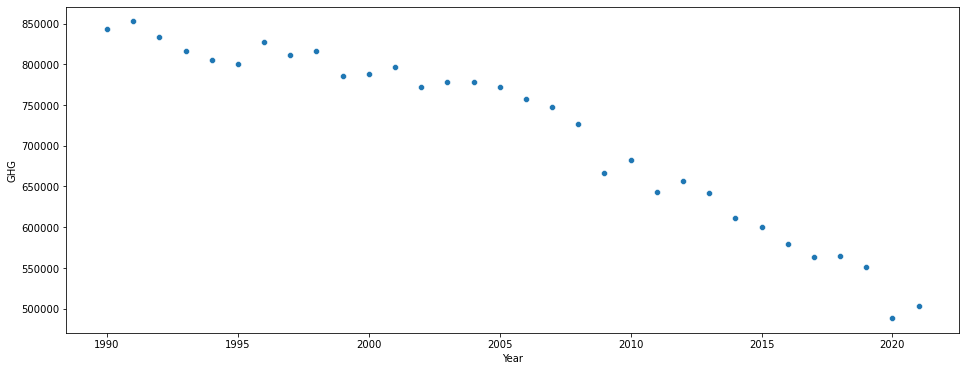

In [8]:
#Graph of Year and GHG
plt.rcParams["figure.figsize"] = (16, 6)
sns.scatterplot(data = df2,x='Year',y='GHG')
plt.show()

Importing the linear regression model from sklearn.

In [9]:
from sklearn.linear_model import LinearRegression

Instance of the model.

In [10]:
model = LinearRegression()

Setting my variables X and y for the model.

In [11]:
X = df2.drop('GHG',axis=1)
y = df2.drop('Year',axis=1)

Fitting the model.

In [12]:
model.fit(X,y)

LinearRegression()

A data frame of the next 5 years (from 2022). 

In [13]:
#Years to predict
dic = {'Year': [i for i in range(2022,2027)]}
next_5_years = pd.DataFrame(data = dic)
next_5_years

,Year
0,2022
1,2023
2,2024
3,2025
4,2026


Getting the predictions from the linear regression model.

In [14]:
#Predictions
predictions = model.predict(next_5_years)
predictions

array([[529944.69193548],
       [518771.25830279],
       [507597.82467009],
       [496424.39103739],
       [485250.95740469]])

Predictions and the years as a data frame.

In [15]:
#Year and Predictions
GHG_preds = pd.DataFrame(data = predictions,columns=['GHG'])
preds_5_year = pd.concat([next_5_years,GHG_preds],axis=1)
preds_5_year

,Year,GHG
0,2022,529944.691935
1,2023,518771.258303
2,2024,507597.824670
3,2025,496424.391037
4,2026,485250.957405


Plot including the GHG emissions data, predicted GHG emissions and linear regression line.

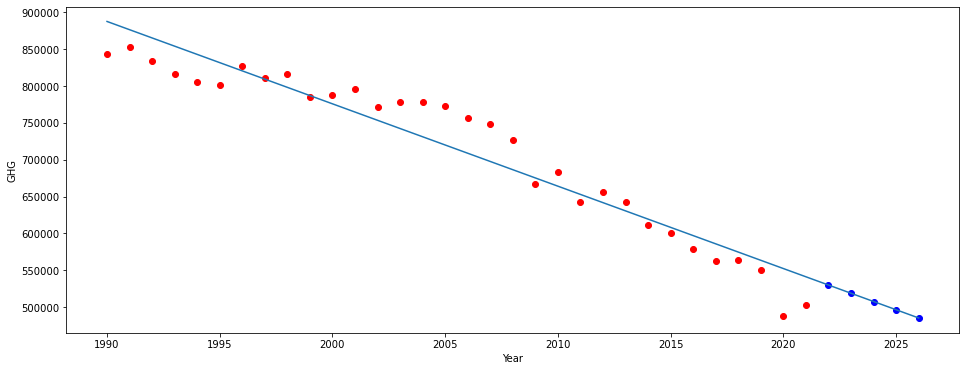

In [16]:
#Main graph with predictions
plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(preds_5_year['Year'],preds_5_year['GHG'],'bo')
plt.plot(df2['Year'],df2['GHG'],'ro')
x = np.linspace(1990, 2026, 50)
plt.plot(x,float(model.coef_)*x+float(model.intercept_))
plt.xlabel('Year')
plt.ylabel('GHG')
plt.show()

The models y-intercept 

In [17]:
model.intercept_

array([23122627.49725074])

The models coefficient.

In [18]:
model.coef_

array([[-11173.4336327]])

### A prediction for 2050 using linear regression. 
Therefore, to reach net zero the UK Government would need to accelarate efforts. 

In [19]:
float(model.coef_)*2050+float(model.intercept_)

217088.55021994188

### Data Frame of industry section and group.
Collect the relevant columns and reset the index. Show head.

In [20]:
df3 = pd.DataFrame(data=[df.loc[i] for i in range(2,24)],index=list_col).T
df3.reset_index(drop='index',inplace=True)
df3['Year'] = df3['Year'].astype({'Year':'int'})
df3.head()

,Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,...,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers; undifferentiated goods and services-producing activities of households for own use,Consumer expenditure
0,1990,55978.4,50762.1,176067.9,217638.6,75232.5,5786.8,12127.0,66667.4,3139.2,...,645.9,2568.7,2934.8,12375.8,6393.0,6151.5,1797.7,1162.8,76.3,143893.7
1,1991,55808.5,50877.2,177032.4,214348.2,76756.7,5946.2,12490.8,67119.0,3550.4,...,721.8,2767.7,3060.6,11673.3,6714.7,6471.1,1885.4,1251.9,75.1,152359.2
2,1992,55510.4,51480.6,170118.3,202484.4,76870.8,6058.3,12324.7,68163.3,3270.5,...,692.8,2672.5,3024.1,11826.0,6845.3,6828.4,1712.9,1191.3,76.8,150676.4
3,1993,54725.4,51092.0,165079.3,185006.1,77189.4,6124.1,12571.6,69528.8,3475.9,...,731.9,2564.0,3119.4,12017.5,5948.6,6509.5,1793.5,1249.9,78.2,155426.7
4,1994,55487.3,44876.2,168003.9,180725.0,77556.2,6391.0,12970.1,70523.6,3453.5,...,750.3,2614.2,3217.2,11377.5,5427.6,6587.7,1739.3,1241.8,81.9,150210.3


The Transport and storage emissions through the years.

In [21]:
df3[['Year','Transport and storage']]

,Year,Transport and storage
0,1990,66667.4
1,1991,67119.0
2,1992,68163.3
3,1993,69528.8
4,1994,70523.6
5,1995,73415.5
6,1996,79112.2
7,1997,88152.6
8,1998,93145.3
9,1999,91479.0
